<a href="https://colab.research.google.com/github/Paulina9555/Test/blob/master/NLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rozgrzewka

In [ ]:
# 1. Zadanie rozgrzewkowe

In [ ]:
!wget --no-check-certificate https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip /content/smsspamcollection.zip

--2024-01-27 08:33:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z     [ <=>                ] 198.65K   994KB/s    in 0.2s    

2024-01-27 08:33:04 (994 KB/s) - ‘smsspamcollection.zip’ saved [203415]

Archive:  /content/smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


In [ ]:
import pandas as pd
df = pd.read_csv("/content/SMSSpamCollection", sep='\t', header=None, names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# ham - nie jest to spam
# spam - to jest spam

# Rozwiazanie

In [ ]:
import nltk
nltk.download("punkt")

nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:

def normalize_text(text):
  text = text.lower()
  words = nltk.word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  filtered_words = [word for word in words if word not in stop_words]
  stemmer = PorterStemmer()
  stemmed_words = [stemmer.stem(word) for word in filtered_words]
  no_punctuation_words = [word for word in stemmed_words if word not in string.punctuation]
  lemmatizer = WordNetLemmatizer()
  lemmazitzed_words = [lemmatizer.lemmatize(word, pos='v') for word in no_punctuation_words]
  return " ".join(lemmazitzed_words)


X = df['message'].apply(normalize_text)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)


vectorizer = TfidfVectorizer(max_features=1000, ngram_range = (1,2))
X_train_vec = vectorizer.fit_transform(X_train).toarray()


clf= SVC(kernel='linear')
clf.fit(X_train_vec, y_train)

X_test_vec = vectorizer.transform(X_test).toarray()

y_pred = clf.predict(X_test_vec)


print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1583
        spam       0.98      0.88      0.92       256

    accuracy                           0.98      1839
   macro avg       0.98      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839



#Spacy

In [ ]:
!python -m spacy download en_core_web_lg

2024-01-27 08:56:53.491249: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-27 08:56:53.491313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-27 08:56:53.492762: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-27 08:56:53.501494: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-27 08:56:54.685655: W tensorflow/compiler/tf2

In [ ]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [ ]:
text = "Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976. " \
       "It is headquartered in Cupertino, California."

In [ ]:
doc = nlp(text)

In [ ]:
# tokenizacja
tokens = [token.text for token in doc]
tokens

['Apple',
 'Inc.',
 'was',
 'founded',
 'by',
 'Steve',
 'Jobs',
 ',',
 'Steve',
 'Wozniak',
 ',',
 'and',
 'Ronald',
 'Wayne',
 'in',
 '1976',
 '.',
 'It',
 'is',
 'headquartered',
 'in',
 'Cupertino',
 ',',
 'California',
 '.']

In [ ]:
# POS
pos_tags = [(token.text, token.pos_) for token in doc]
pos_tags

[('Apple', 'PROPN'),
 ('Inc.', 'PROPN'),
 ('was', 'AUX'),
 ('founded', 'VERB'),
 ('by', 'ADP'),
 ('Steve', 'PROPN'),
 ('Jobs', 'PROPN'),
 (',', 'PUNCT'),
 ('Steve', 'PROPN'),
 ('Wozniak', 'PROPN'),
 (',', 'PUNCT'),
 ('and', 'CCONJ'),
 ('Ronald', 'PROPN'),
 ('Wayne', 'PROPN'),
 ('in', 'ADP'),
 ('1976', 'NUM'),
 ('.', 'PUNCT'),
 ('It', 'PRON'),
 ('is', 'AUX'),
 ('headquartered', 'VERB'),
 ('in', 'ADP'),
 ('Cupertino', 'PROPN'),
 (',', 'PUNCT'),
 ('California', 'PROPN'),
 ('.', 'PUNCT')]

In [ ]:
# NER - named entity recognition
named_entites = [(entity.text, entity.label_) for entity in doc.ents]

In [ ]:
named_entites

[('Apple Inc.', 'ORG'),
 ('Steve Jobs', 'PERSON'),
 ('Steve Wozniak', 'PERSON'),
 ('Ronald Wayne', 'PERSON'),
 ('1976', 'DATE'),
 ('Cupertino', 'GPE'),
 ('California', 'GPE')]

In [ ]:
def explain_text_entities(text):
  print(text)
  doc = nlp(text)
  for ent in doc.ents:
    print(f"Entity: {ent} - Label: {ent.label_} - {spacy.explain(ent.label_)}")

In [ ]:
explain_text_entities("Harry Potter watched Robert Oppenheimer yesterday in Warsaw")

Harry Potter watched Robert Oppenheimer yesterday in Warsaw
Entity: Harry Potter - Label: PERSON - People, including fictional
Entity: Robert Oppenheimer - Label: PERSON - People, including fictional
Entity: yesterday - Label: DATE - Absolute or relative dates or periods
Entity: Warsaw - Label: GPE - Countries, cities, states


In [ ]:
def display_ent(nlp, text):
  doc = nlp(text)
  spacy.displacy.render(doc, style='ent', jupyter=True)

In [ ]:
display_ent(nlp,text)

In [ ]:
display_ent(nlp, "Kazimierz Kowalski walczył pod Grundwaldem")

In [ ]:
!python -m spacy download pl_core_news_lg

2024-01-27 09:16:05.879228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-27 09:16:05.879289: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-27 09:16:05.880560: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-27 09:16:07.085127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.7/573.7 MB 931.0 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')


In [ ]:
nlp_pl = spacy.load('pl_core_news_lg')
display_ent(nlp_pl, "Kazimierz Kowalski walczyl pod Grundwaldem")

# DJT tweets

In [ ]:
import pandas as pd

path = "https://raw.githubusercontent.com/Kamil128/Training_DS_NLP/main/all_djt_tweets.csv" # tweety Donalda Trumpa
tweets = pd.read_csv(path)

<ipython-input-32-24f0038013ce>:4: DtypeWarning: Columns (0,1,2,3,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv(path)


In [ ]:
tweets.head()

,Unnamed: 0,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,0,Twitter for iPhone,Over 90% approval rating for your all time fav...,Mon Aug 27 00:39:38 +0000 2018,27040,106838.0,False,1.033877e+18
1,1,Twitter for iPhone,“Mainstream Media tries to rewrite history to ...,Sun Aug 26 22:01:33 +0000 2018,21346,76682.0,False,1.033837e+18
2,2,Twitter for iPhone,Fantastic numbers on consumer spending release...,Sun Aug 26 14:31:06 +0000 2018,18960,87334.0,False,1.033724e+18
3,3,Twitter for iPhone,"...And it will get, as I have always said, muc...",Sun Aug 26 14:27:16 +0000 2018,14963,62956.0,False,1.033723e+18
4,4,Twitter for iPhone,RT @realDonaldTrump: Social Media Giants are s...,Sun Aug 26 14:25:47 +0000 2018,50142,0.0,True,1.033722e+18


In [ ]:
tweet = tweets.loc[0,'text']
print(tweet)

Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please!


In [ ]:
doc = nlp(tweet)

In [ ]:
text_doc = []
for token in doc:
  data = {
      'text': token.text,
      'lemma': token.lemma_,
      'POS': token.pos_,
      'shape': token.shape_,
      'is_alpha': token.is_alpha,
      'is_stop': token.is_stop
  }
  text_doc.append(data)
pd.DataFrame(text_doc)

,text,lemma,POS,shape,is_alpha,is_stop
0,Over,over,ADP,Xxxx,True,True
1,90,90,NUM,dd,False,False
2,%,%,NOUN,%,False,False
3,approval,approval,NOUN,xxxx,True,False
4,rating,rating,NOUN,xxxx,True,False
5,for,for,ADP,xxx,True,True
6,your,your,PRON,xxxx,True,True
7,all,all,DET,xxx,True,True
8,time,time,NOUN,xxxx,True,False
9,favorite,favorite,ADJ,xxxx,True,False


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
text = tweets['text'].str.cat(sep=' ').lower()

In [ ]:
text[:100]

'over 90% approval rating for your all time favorite (i hope) president within the republican party a'

In [ ]:
len(text)

4385805

In [ ]:
max_length = 1_000_000 - 1
text = text[-max_length:]

In [ ]:
url_reg = r'[a-z]*[:.]\S+'  # remove urls
text = re.sub(url_reg, "", text)

noise_reg = r'\&amp'  # removing &amps as in html it's &
text = re.sub(noise_reg, '', text)

In [ ]:
%%time
doc = nlp(text)

CPU times: user 19.5 s, sys: 2.8 s, total: 22.3 s
Wall time: 22.4 s


In [ ]:
items_of_interest = list(doc.noun_chunks)

In [ ]:
items_of_interest[:10]

[he,
 a lot,
 stories,
 celebapprentice people,
 @amandatmiller,
 she,
 a vp,
 marketing,
 the trump organization,
 #celebapprentice]

In [ ]:
items_of_interest = [x.text for x in items_of_interest]
df_nouns = pd.DataFrame(items_of_interest, columns=["TrumpSays"])

<Axes: xlabel='count', ylabel='TrumpSays'>

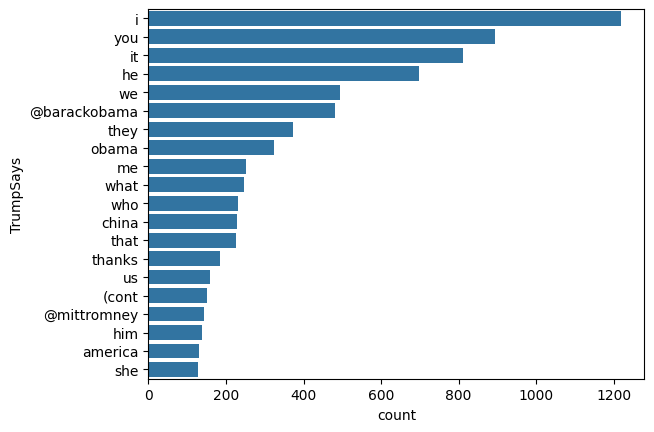

In [ ]:
plt.figure()
sns.countplot(y='TrumpSays',
              data=df_nouns,
              order = df_nouns['TrumpSays'].value_counts().iloc[:20].index)

In [ ]:
trump_topic = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == 'NOUN'):
      trump_topic.append(token.text)

df_nouns = pd.DataFrame(trump_topic, columns=['TrumpSays'])

<Axes: xlabel='count', ylabel='TrumpSays'>

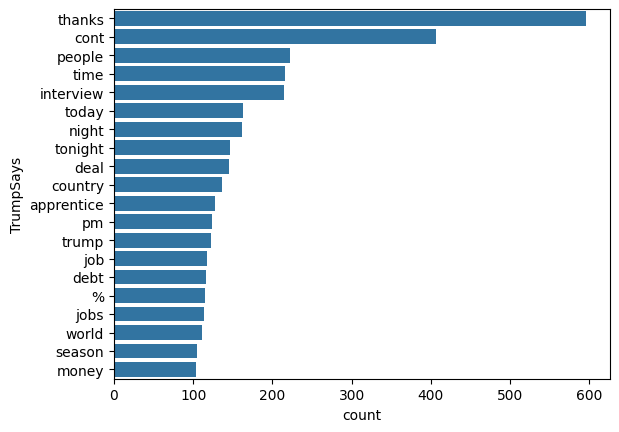

In [ ]:
plt.figure()
sns.countplot(y='TrumpSays',
              data=df_nouns,
              order = df_nouns['TrumpSays'].value_counts().iloc[:20].index)

In [ ]:
trump_topic = []
for ent in doc.ents:
    if ent.label_ in ['PERSON']:
      trump_topic.append(ent.text)

df_nouns = pd.DataFrame(trump_topic, columns=['TrumpSays'])

<Axes: xlabel='count', ylabel='TrumpSays'>

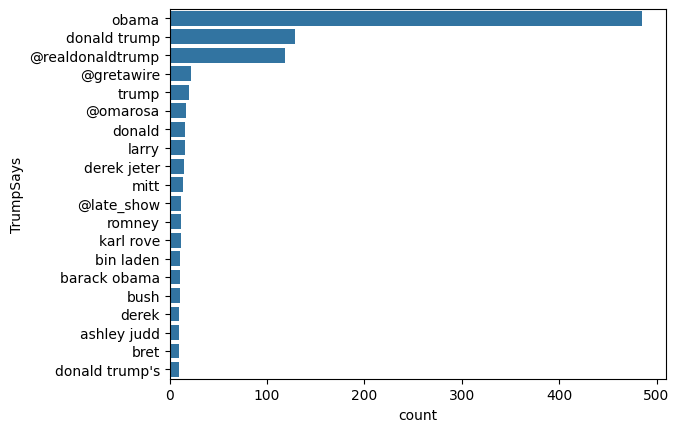

In [ ]:
plt.figure()
sns.countplot(y='TrumpSays',
              data=df_nouns,
              order = df_nouns['TrumpSays'].value_counts().iloc[:20].index)

In [ ]:
trump_topic = []
for ent in doc.ents:
    if ent.label_ in ['GPE']:
      trump_topic.append(ent.text)

df_nouns = pd.DataFrame(trump_topic, columns=['TrumpSays'])

<Axes: xlabel='count', ylabel='TrumpSays'>

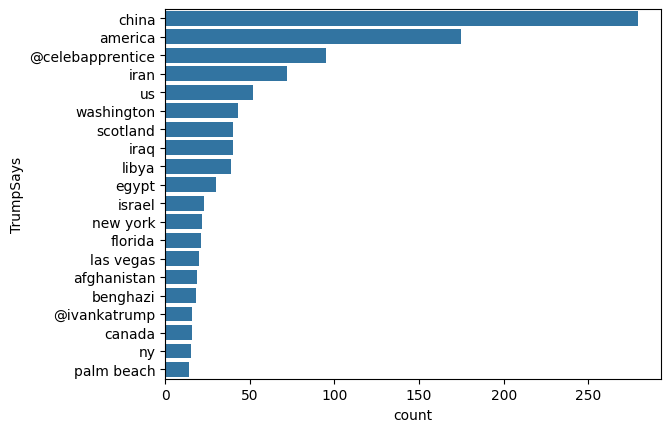

In [ ]:
plt.figure()
sns.countplot(y='TrumpSays',
              data=df_nouns,
              order = df_nouns['TrumpSays'].value_counts().iloc[:20].index)

In [ ]:
df_nouns[df_nouns['TrumpSays'] == 'poland']

,TrumpSays
1872,poland
1874,poland
1875,poland
1877,poland
1878,poland
1883,poland


# Zadanie - Analiza movie reviews

In [ ]:
# zadanie - przeprowadź analize movie reviews podobnie jak powyzej:
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

import random

random.shuffle(documents)
X = [" ".join(words) for words, _ in documents]
y = [category for _, category in documents]
df = pd.DataFrame({"review": X, "opinion": y})

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [ ]:
df.head()

,review,opinion
0,"when jim henson passed away , he left behind d...",pos
1,the catch phrase for disney ' s rocket man is ...,neg
2,"known as the most successful , highest - gross...",pos
3,it was with a huge lack of something to do tha...,neg
4,the long and illustrious career of robin willi...,pos


# Przykładowe rozwiazanie

In [ ]:
text = df['review'].str.cat(sep=' ').lower()

In [ ]:
len(text)

7810519

In [ ]:
text = text[:max_length]

In [ ]:
doc = nlp(text)

In [ ]:
movie_topic = []
for ent in doc.ents:
    if ent.label_ in ['PERSON']:
      movie_topic.append(ent.text)

df_persons = pd.DataFrame(movie_topic, columns=['MoviePerson'])

<Axes: xlabel='count', ylabel='MoviePerson'>

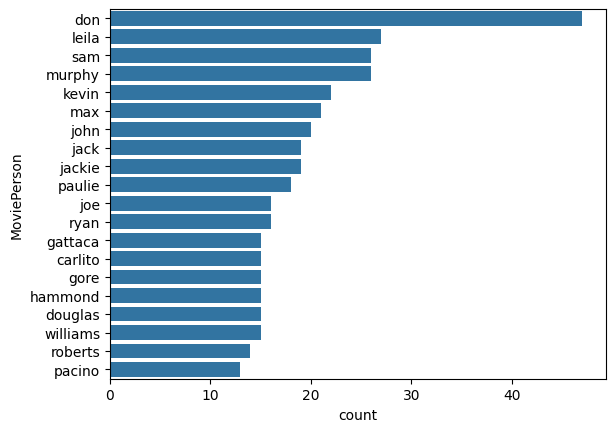

In [ ]:
plt.figure()
sns.countplot(y='MoviePerson',
              data=df_persons,
              order = df_persons['MoviePerson'].value_counts().iloc[:20].index)

# Word2Vec

In [ ]:
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
corpus = [
    "I love natural language processing",
    "Word embeddings are powerful",
    "Machine learning is exciting",
    "NLP is fascinating",
    "I enjoy working with Word2Vec",
]
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
tokenized_corpus

[['i', 'love', 'natural', 'language', 'processing'],
 ['word', 'embeddings', 'are', 'powerful'],
 ['machine', 'learning', 'is', 'exciting'],
 ['nlp', 'is', 'fascinating'],
 ['i', 'enjoy', 'working', 'with', 'word2vec']]

In [ ]:
model = Word2Vec(tokenized_corpus,vector_size = 100,min_count=1)

In [ ]:
word_vector = model.wv['natural']
word_vector

array([-0.00713902,  0.00124103, -0.00717672, -0.00224462,  0.0037193 ,
        0.00583312,  0.00119818,  0.00210273, -0.00411039,  0.00722533,
       -0.00630704,  0.00464722, -0.00821997,  0.00203647, -0.00497705,
       -0.00424769, -0.00310898,  0.00565521,  0.0057984 , -0.00497465,
        0.00077333, -0.00849578,  0.00780981,  0.00925729, -0.00274233,
        0.00080022,  0.00074665,  0.00547788, -0.00860608,  0.00058446,
        0.00686942,  0.00223159,  0.00112468, -0.00932216,  0.00848237,
       -0.00626413, -0.00299237,  0.00349379, -0.00077263,  0.00141129,
        0.00178199, -0.0068289 , -0.00972481,  0.00904058,  0.00619805,
       -0.00691293,  0.00340348,  0.00020606,  0.00475375, -0.00711994,
        0.00402695,  0.00434743,  0.00995737, -0.00447374, -0.00138926,
       -0.00731732, -0.00969783, -0.00908026, -0.00102275, -0.00650329,
        0.00484973, -0.00616403,  0.00251919,  0.00073944, -0.00339215,
       -0.00097922,  0.00997913,  0.00914589, -0.00446183,  0.00

In [ ]:
similar_words = model.wv.most_similar('is')

In [ ]:
similar_words

[('nlp', 0.16072483360767365),
 ('machine', 0.15923379361629486),
 ('exciting', 0.13725273311138153),
 ('fascinating', 0.12300863116979599),
 ('working', 0.08546062558889389),
 ('love', 0.06797593832015991),
 ('embeddings', 0.03364057466387749),
 ('enjoy', 0.022312669083476067),
 ('language', 0.009391162544488907),
 ('with', 0.008315935730934143)]

In [ ]:
text = ["different word", "sample test1"]
output = [doc.vector for doc in nlp.pipe(text)]

In [ ]:
output

[array([ 6.3604999e-01,  1.0797999e+00,  2.2070498e+00, -1.9983999e-01,
         1.0690950e+00,  1.7828000e+00,  2.0597000e+00,  1.7794000e+00,
        -6.7280002e+00,  1.8647499e+00,  7.0355000e+00,  7.9695004e-01,
        -5.6655502e+00,  1.9159000e+00,  2.2029550e+00,  3.4894997e-01,
         1.7985801e+00, -6.4598000e-01, -8.2085001e-01,  1.5545000e+00,
        -2.9547405e+00,  3.2321998e-01, -1.5964000e+00, -2.6478499e-01,
        -9.9150002e-01, -1.8810500e+00, -3.5124993e-01, -3.2754004e-01,
        -8.4493494e-01,  4.0506001e+00,  1.9487150e+00, -3.0623999e+00,
        -5.5287499e+00, -2.2913401e+00,  1.9523550e+00, -4.4787998e+00,
        -3.8070998e+00,  3.3689851e-01,  3.8009501e+00,  2.7084000e+00,
         9.2425001e-01,  1.5214998e-01, -2.0728600e+00, -1.7661500e-01,
        -3.1254501e+00,  3.6107500e+00,  6.8540502e-01, -1.7867050e+00,
        -8.1720352e-01,  8.8400006e-02, -2.4092002e+00, -6.0979998e-01,
        -2.8084999e-01, -2.7845500e+00, -3.5792501e+00,  1.75819

In [ ]:
# Przykład Word2Vec ze spacy dla movie reviews

In [ ]:
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

import random

random.shuffle(documents)

X = [" ".join(words) for words, _ in documents]
y = [category for _, category in documents]

df = pd.DataFrame({"review": X, "opinion": y})

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
df.head()

,review,opinion
0,plot : a young recruit gets plucked out of now...,pos
1,"while watching "" shallow grave , "" i found mys...",pos
2,"the "" submarine "" genre of movies seems to be ...",pos
3,"susan granger ' s review of "" the watcher "" ( ...",neg
4,"everyone knows that old rule , ' never work wi...",neg


In [ ]:
def get_word_vectors(docs):
  return [doc.vector for doc in nlp.pipe(docs)]

In [ ]:
import nltk
nltk.download("punkt")
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def normalize_text(text):
  text = text.lower()
  words = nltk.word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  filtered_words = [word for word in words if word not in stop_words]
  stemmer = PorterStemmer()
  stemmed_words = [stemmer.stem(word) for word in filtered_words]
  no_punctuation_words = [word for word in stemmed_words if word not in string.punctuation]
  lemmatizer = WordNetLemmatizer()
  lemmazitzed_words = [lemmatizer.lemmatize(word, pos='v') for word in no_punctuation_words]
  return " ".join(lemmazitzed_words)


X = df['review'].apply(normalize_text)
y = df['opinion']





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X_train_vectors = get_word_vectors(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_vectors,y, test_size=0.33)

In [ ]:
clf= SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         neg       0.72      0.74      0.73       322
         pos       0.75      0.72      0.73       338

    accuracy                           0.73       660
   macro avg       0.73      0.73      0.73       660
weighted avg       0.73      0.73      0.73       660



In [ ]:
import numpy as np
X_train_vec = np.array(X_train)

In [ ]:
X_train_vec.shape

(1340, 300)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu',input_dim = X_train_vec[0].shape[0]))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(),loss = "binary_crossentropy",metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                19264     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 35905 (140.25 KB)
Trainable params: 35905 

In [ ]:
y_train_num = np.array([1 if y== 'pos' else 0 for y in y_train])

In [ ]:
y_test_num = np.array([1 if y== 'pos' else 0 for y in y_test])

In [ ]:
y_train_num[:5]

array([1, 0, 0, 0, 0])

In [ ]:
model.fit(X_train_vec, y_train_num, epochs=10, batch_size=256, verbose=1)

Epoch 1/10
6/6 [==============================] - 2s 11ms/step - loss: 0.7485 - accuracy: 0.4933
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 0.7084 - accuracy: 0.4903
Epoch 3/10
6/6 [==============================] - 0s 16ms/step - loss: 0.6935 - accuracy: 0.5396
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.6878 - accuracy: 0.5425
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 0.6777 - accuracy: 0.5813
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.6809 - accuracy: 0.5791
Epoch 7/10
6/6 [==============================] - 0s 6ms/step - loss: 0.6740 - accuracy: 0.5776
Epoch 8/10
6/6 [==============================] - 0s 8ms/step - loss: 0.6707 - accuracy: 0.5940
Epoch 9/10
6/6 [==============================] - 0s 8ms/step - loss: 0.6728 - accuracy: 0.5828
Epoch 10/10
6/6 [==============================] - 0s 8ms/step - loss: 0.6678 - accuracy: 0.5836


In [ ]:
X_test_vec = np.array(X_test)
loss_and_metric = model.evaluate(X_test_vec, y_test_num)

21/21 [==============================] - 2s 6ms/step - loss: 0.6461 - accuracy: 0.6894


In [ ]:
print('Loss = ', loss_and_metric[0])
print('Acc = ', loss_and_metric[1])

Loss =  0.6460887789726257
Acc =  0.689393937587738
